<<h1 style="color: blue; text-align: center; font-size: 25px;"><b>IoTGuardian: Real-Time Threat Detection System Using RT-IoT2022 </b></h1>
<h1 style="color: blue; text-align: center; font-size: 20px;"><b>DSML Capstone Project</b></h1>

### Problem Description: Real-Time Threat Detection System Using RT-IoT2022

#### Background
With the proliferation of IoT devices in critical sectors such as healthcare, smart homes, and industrial automation, ensuring network security has become a paramount concern. IoT networks are inherently vulnerable to cyber threats due to their resource-constrained nature and lack of robust security mechanisms. The RT-IoT 2022 dataset provides a rich source of real-world network traffic data, capturing both normal operations and various sophisticated cyber-attack patterns.

#### Problem Statement
The goal of this project is to leverage the RT-IoT 2022 dataset to analyze IoT network traffic and develop a machine learning-based Intrusion Detection System (IDS). This system should be capable of accurately identifying malicious network activities, distinguishing between different types of attacks, and enhancing the resilience of IoT environments against cyber threats.


### Objective:

Create machine learning models that can effectively:

1. Process bidirectional network traffic data
2. Analyze patterns from diverse IoT devices (ThingSpeak-LED, Wipro-Bulb, MQTT-Temp)
3. Identify and classify various attack patterns"

### Dataset Overview
The RT-IoT 2022 dataset integrates traffic from diverse IoT devices, such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, while incorporating real and simulated cyber-attacks, including:

* Brute-Force SSH Attacks
* DDoS Attacks (Hping & Slowloris)
* Nmap Scanning Patterns

The dataset features bidirectional network traffic attributes, captured through the Zeek network monitoring tool and the Flowmeter plugin, ensuring a comprehensive representation of IoT network behavior.

Dataset LInk: https://archive.ics.uci.edu/dataset/942/rt-iot2022


#### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

#### Loading the Data

In [8]:
data = pd.read_csv('new_rt_IOT.csv')

In [9]:
df = pd.DataFrame(data)

In [10]:
df.head()

,Unnamed: 0,id,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [11]:
df.tail(5)

,Unnamed: 0,id,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
123112,123112,2005,59247,63331,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,123113,2006,59247,64623,tcp,-,0.000007,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,123114,2007,59247,64680,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,123115,2008,59247,65000,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123116,123116,2009,59247,65129,tcp,-,0.000006,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


### Preprocessing and EDA

**Dropping unwanted columns**

In [14]:
df.drop(columns = ['Unnamed: 0','id'], inplace = True)

In [15]:
df.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [16]:
df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [18]:
df.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

**Checking null values**

In [20]:
df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 84, dtype: int64

##### No null values detected

**Checking for duplicates**

In [23]:
df.duplicated().sum()

5195

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.duplicated().sum()

0

##### found 5195 duplicate values and it is removed

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117922 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 117922 non-null  int64  
 1   id.resp_p                 117922 non-null  int64  
 2   proto                     117922 non-null  object 
 3   service                   117922 non-null  object 
 4   flow_duration             117922 non-null  float64
 5   fwd_pkts_tot              117922 non-null  int64  
 6   bwd_pkts_tot              117922 non-null  int64  
 7   fwd_data_pkts_tot         117922 non-null  int64  
 8   bwd_data_pkts_tot         117922 non-null  int64  
 9   fwd_pkts_per_sec          117922 non-null  float64
 10  bwd_pkts_per_sec          117922 non-null  float64
 11  flow_pkts_per_sec         117922 non-null  float64
 12  down_up_ratio             117922 non-null  float64
 13  fwd_header_size_tot       117922 non-null  int64 

In [28]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id.orig_p,117922.0,NaN,NaN,NaN,34949.094317,18966.047699,0.0,18352.25,37534.0,51036.0,65535.0
id.resp_p,117922.0,NaN,NaN,NaN,1050.812266,5364.536754,0.0,21.0,21.0,21.0,65389.0
proto,117922,3,tcp,105592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,117922,10,-,98199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow_duration,117922.0,NaN,NaN,NaN,3.808474,127.064242,0.0,0.000001,0.000004,0.000005,21728.33558
...,...,...,...,...,...,...,...,...,...,...,...
idle.std,117922.0,NaN,NaN,NaN,47210.692713,1114041.143033,0.0,0.0,0.0,0.0,120802870.6
fwd_init_window_size,117922.0,NaN,NaN,NaN,6248.730101,18893.603277,0.0,64.0,64.0,64.0,65535.0
bwd_init_window_size,117922.0,NaN,NaN,NaN,2816.081393,10167.532706,0.0,0.0,0.0,0.0,65535.0
fwd_last_window_size,117922.0,NaN,NaN,NaN,740.173165,6242.32384,0.0,64.0,64.0,64.0,65535.0


In [29]:
df.dtypes

id.orig_p                 int64
id.resp_p                 int64
proto                    object
service                  object
flow_duration           float64
                         ...   
idle.std                float64
fwd_init_window_size      int64
bwd_init_window_size      int64
fwd_last_window_size      int64
Attack_type              object
Length: 84, dtype: object

In [30]:
attack_count = df['Attack_type'].value_counts()

In [31]:
attack_count

Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [32]:
df['proto'].value_counts()

proto
tcp     105592
udp      12296
icmp        34
Name: count, dtype: int64

In [33]:
df['service'].value_counts()

service
-         98199
dns        9444
mqtt       4132
http       3289
ssl        2656
ntp         115
dhcp         29
irc          28
ssh          28
radius        2
Name: count, dtype: int64

In [34]:
df['service'] = df['service'].replace('-', 'unknown')

In [35]:
df['service'].value_counts()

service
unknown    98199
dns         9444
mqtt        4132
http        3289
ssl         2656
ntp          115
dhcp          29
irc           28
ssh           28
radius         2
Name: count, dtype: int64

In [36]:
dfc = df.copy()

In [37]:
dfc.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


### Encoding

##### Encoding Proto and Service Columns

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

encoded_cols = ['proto', 'service']
for col in encoded_cols:
    dfc[col] = le.fit_transform(dfc[col]) 

In [41]:
dfc.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,1,4,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,1,4,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,1,4,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,1,4,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,1,4,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [42]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117922 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 117922 non-null  int64  
 1   id.resp_p                 117922 non-null  int64  
 2   proto                     117922 non-null  int32  
 3   service                   117922 non-null  int32  
 4   flow_duration             117922 non-null  float64
 5   fwd_pkts_tot              117922 non-null  int64  
 6   bwd_pkts_tot              117922 non-null  int64  
 7   fwd_data_pkts_tot         117922 non-null  int64  
 8   bwd_data_pkts_tot         117922 non-null  int64  
 9   fwd_pkts_per_sec          117922 non-null  float64
 10  bwd_pkts_per_sec          117922 non-null  float64
 11  flow_pkts_per_sec         117922 non-null  float64
 12  down_up_ratio             117922 non-null  float64
 13  fwd_header_size_tot       117922 non-null  int64 

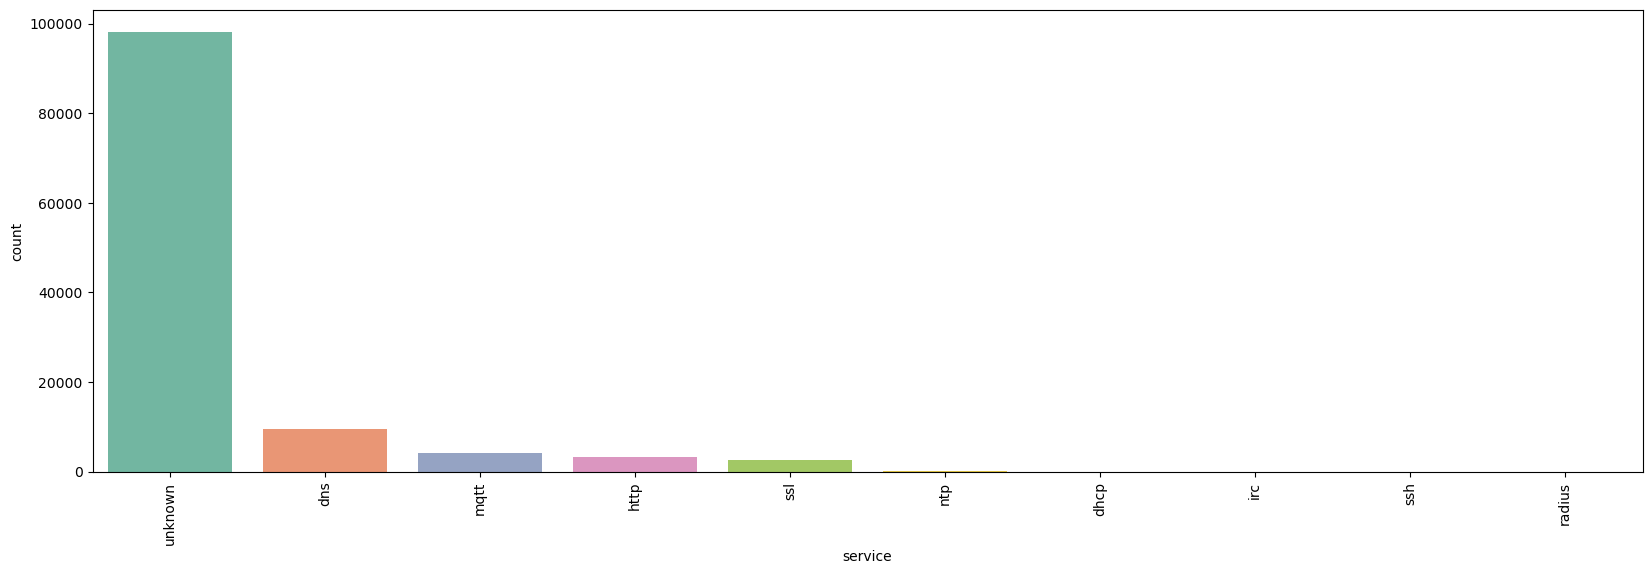

In [43]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['service'],order=df['service'].value_counts().index,palette ='Set2')
plt.xticks(rotation=90)
plt.show()

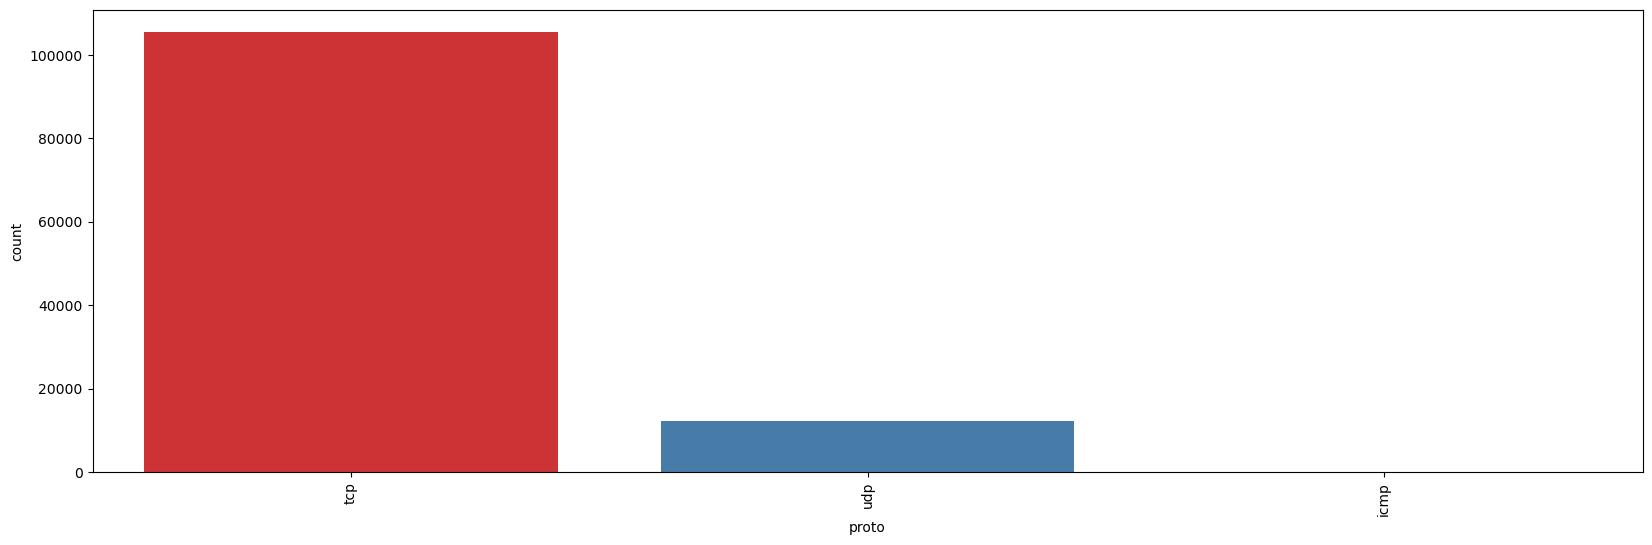

In [44]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['proto'],order=df['proto'].value_counts().index,palette ='Set1')
plt.xticks(rotation=90)
plt.show()

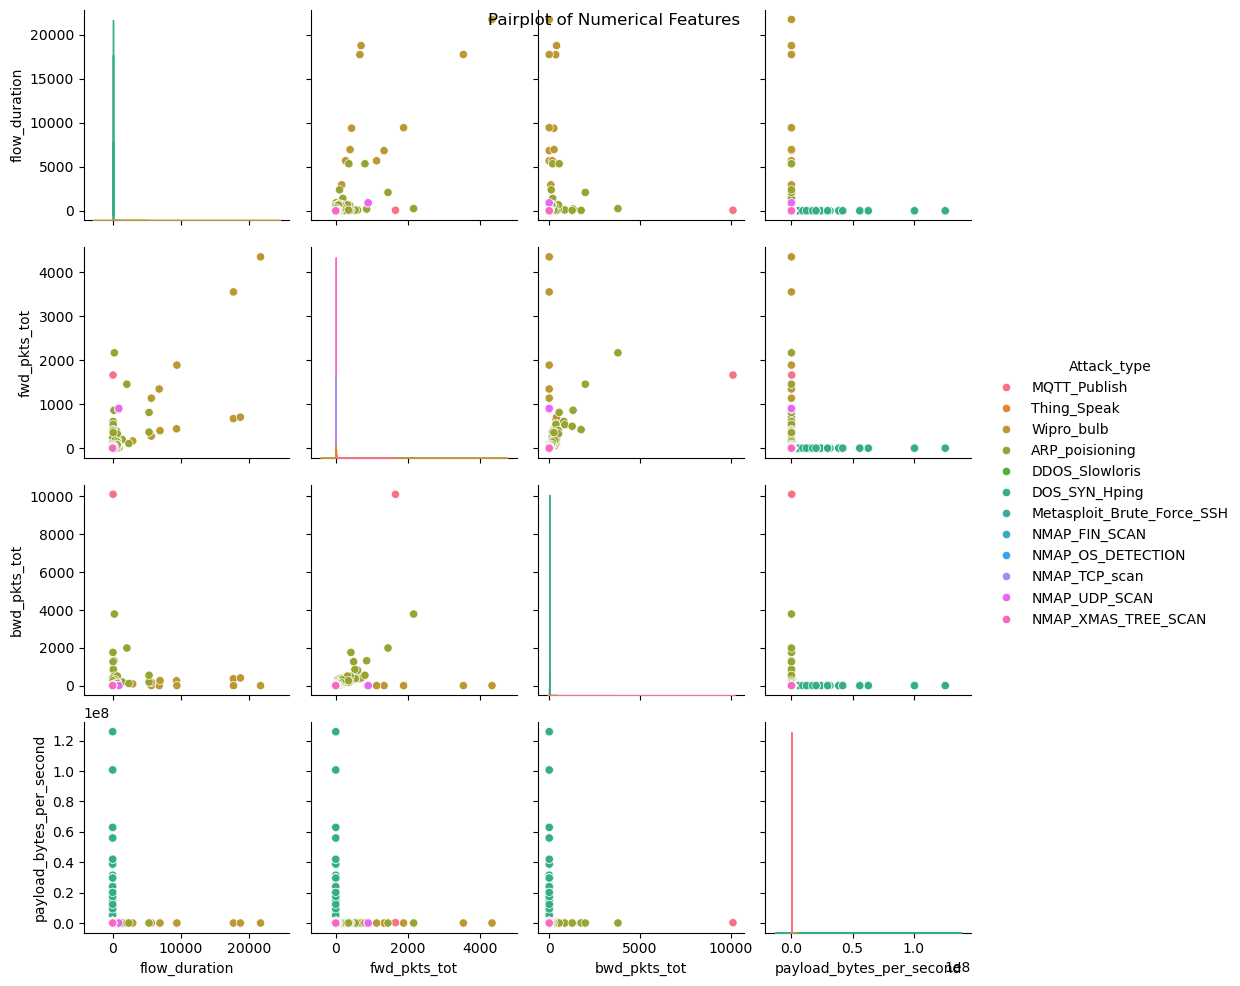

In [45]:
sns.pairplot(dfc[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'payload_bytes_per_second', 'Attack_type']], hue='Attack_type')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

### Key Observations:

#### Attack Classification by Traffic Patterns:

DOS_SYN_Hping (green dots): Characterized by very high payload bytes per second (up to 1.3×10⁸) but low packet counts and short flow durations
MQTT_Publish (pink dots): Shows extremely high backward packet counts (around 10,000) but relatively low forward packets
Wipro_bulb (gold/brown dots): Shows instances with very high flow durations (15,000-20,000) and high forward packet counts


#### Flow Duration Patterns:

Most attacks have short flow durations except for Wipro_bulb attacks
DOS_SYN_Hping attacks consistently have very short durations
The first panel shows an extreme outlier in flow duration (green vertical line)


#### Packet Distribution:

Forward vs backward packet counts vary significantly by attack type
NMAP scans (various shades of blue/purple) typically have low packet counts in both directions
ARP_poisioning (light green) shows moderate packet counts


#### Payload Characteristics:

DOS_SYN_Hping attacks show a distinct pattern with high payload bytes per second
Most other attacks have very low payload bytes per second
The rightmost column shows clear separation between DOS_SYN_Hping and all other attack types


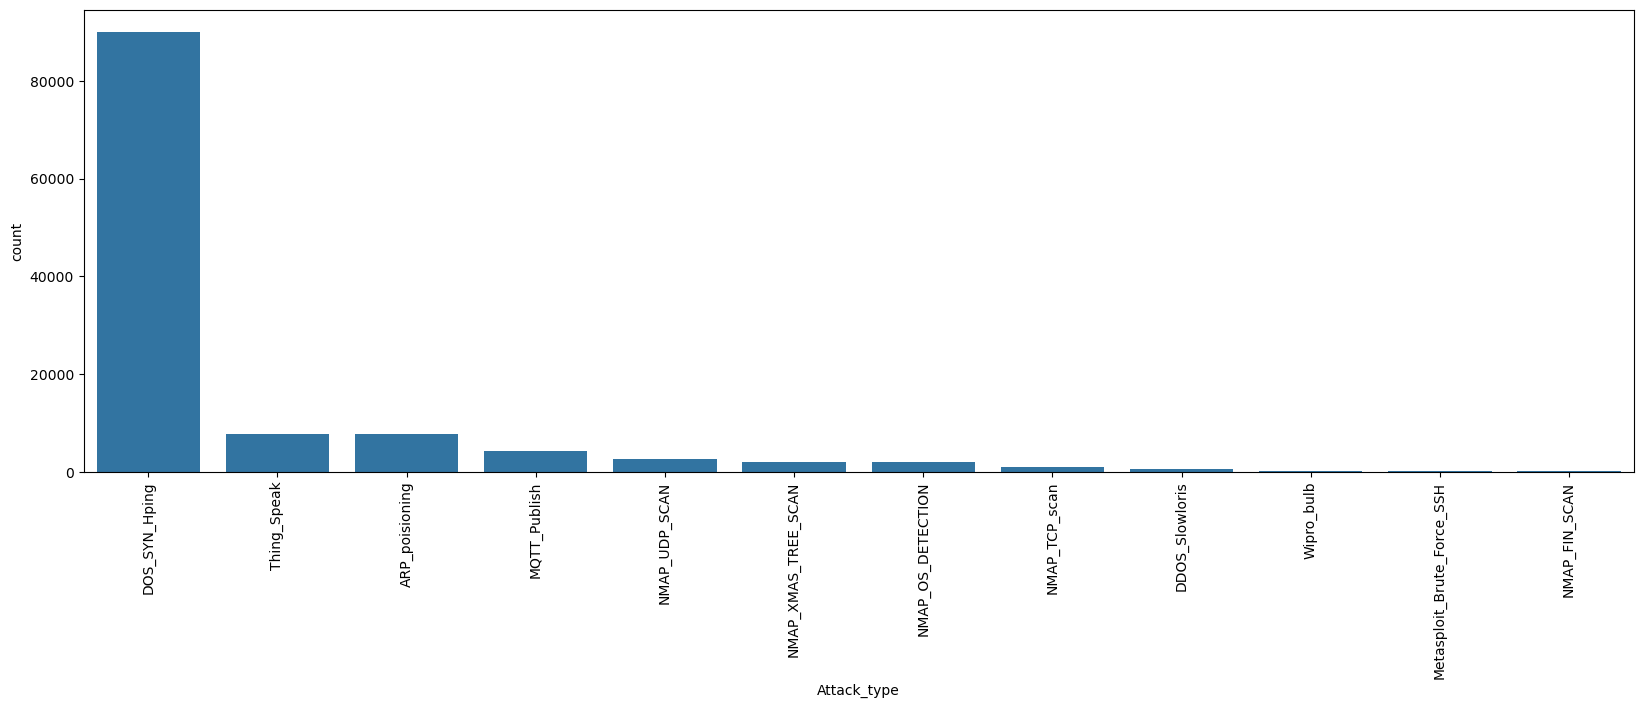

In [47]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attack_type'],order=df['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


#### Found High imbalance in DOS_SYN_Hping attack

## To handle imbalanced data

##### Performing undersampling on DOS_SYN_Hping Attack Type

In [50]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [51]:
smote = SMOTE(random_state=1)

In [52]:
X = dfc.drop(columns=['Attack_type'])  
y = dfc['Attack_type']
# X_resampled, y_resampled = smote.fit_resample(X, y)
# oversample = SMOTE(sampling_strategy='not majority', random_state=42)
undersample = RandomUnderSampler(sampling_strategy={'DOS_SYN_Hping': 10000}, random_state=42)
pipeline = Pipeline(steps=[('under', undersample)])
X_resampled, y_resampled = pipeline.fit_resample(X, y)

In [53]:
print('Original unbalanced dataset shape', len(dfc))
print('Resampled balanced dataset shape', len(y_resampled))

Original unbalanced dataset shape 117922
Resampled balanced dataset shape 37833


In [54]:
balanced_df = pd.DataFrame(X_resampled, columns=list(i for i in list(dfc.describe(include='all').columns) if i != 'Attack_type'))

In [55]:
dfc.shape

(117922, 84)

In [56]:
balanced_df.shape

(37833, 83)

In [57]:
y.value_counts()

Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [58]:
y_resampled.value_counts()

Attack_type
DOS_SYN_Hping                 10000
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

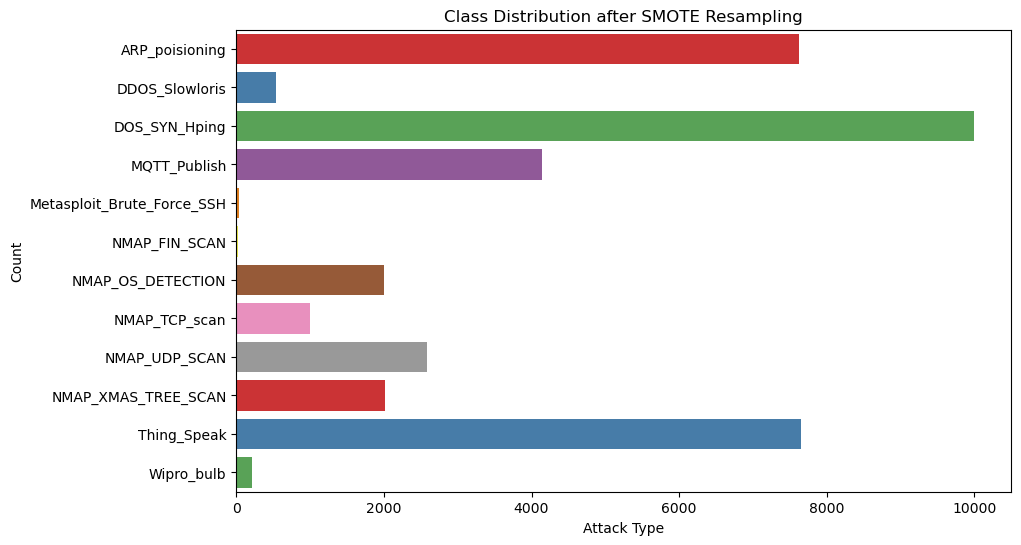

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(y_resampled, palette ='Set1')
plt.title('Class Distribution after SMOTE Resampling')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [60]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37833 entries, 12507 to 12506
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id.orig_p                 37833 non-null  int64  
 1   id.resp_p                 37833 non-null  int64  
 2   proto                     37833 non-null  int32  
 3   service                   37833 non-null  int32  
 4   flow_duration             37833 non-null  float64
 5   fwd_pkts_tot              37833 non-null  int64  
 6   bwd_pkts_tot              37833 non-null  int64  
 7   fwd_data_pkts_tot         37833 non-null  int64  
 8   bwd_data_pkts_tot         37833 non-null  int64  
 9   fwd_pkts_per_sec          37833 non-null  float64
 10  bwd_pkts_per_sec          37833 non-null  float64
 11  flow_pkts_per_sec         37833 non-null  float64
 12  down_up_ratio             37833 non-null  float64
 13  fwd_header_size_tot       37833 non-null  int64  
 14  fwd_hea

#### Checking for duplicates

In [62]:
balanced_df.duplicated().sum()

7

In [63]:
balanced_df.drop_duplicates(inplace = True)

In [64]:
balanced_df.duplicated().sum()

0

##### Removed duplicates

#### Checking for null values

In [67]:
balanced_df.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.avg                0
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Length: 83, dtype: int64

In [68]:
balanced_df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.avg                0
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Length: 83, dtype: int64

##### No null values detected

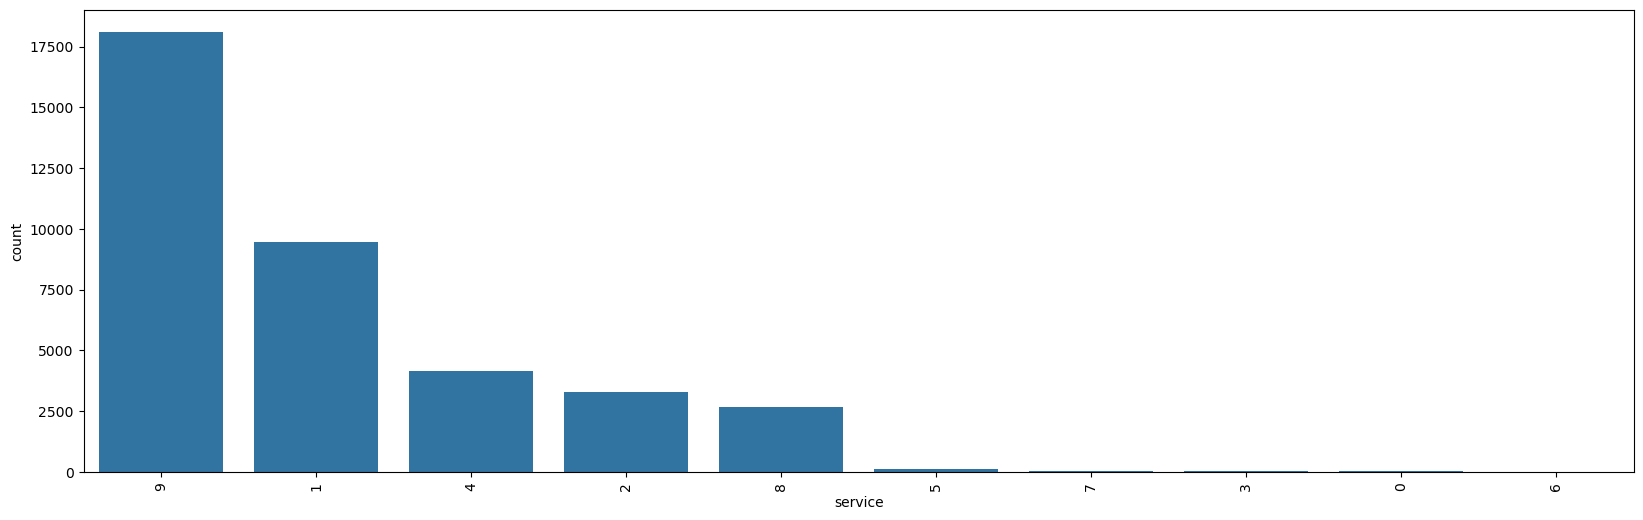

In [70]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=balanced_df,x=balanced_df['service'],order=balanced_df['service'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

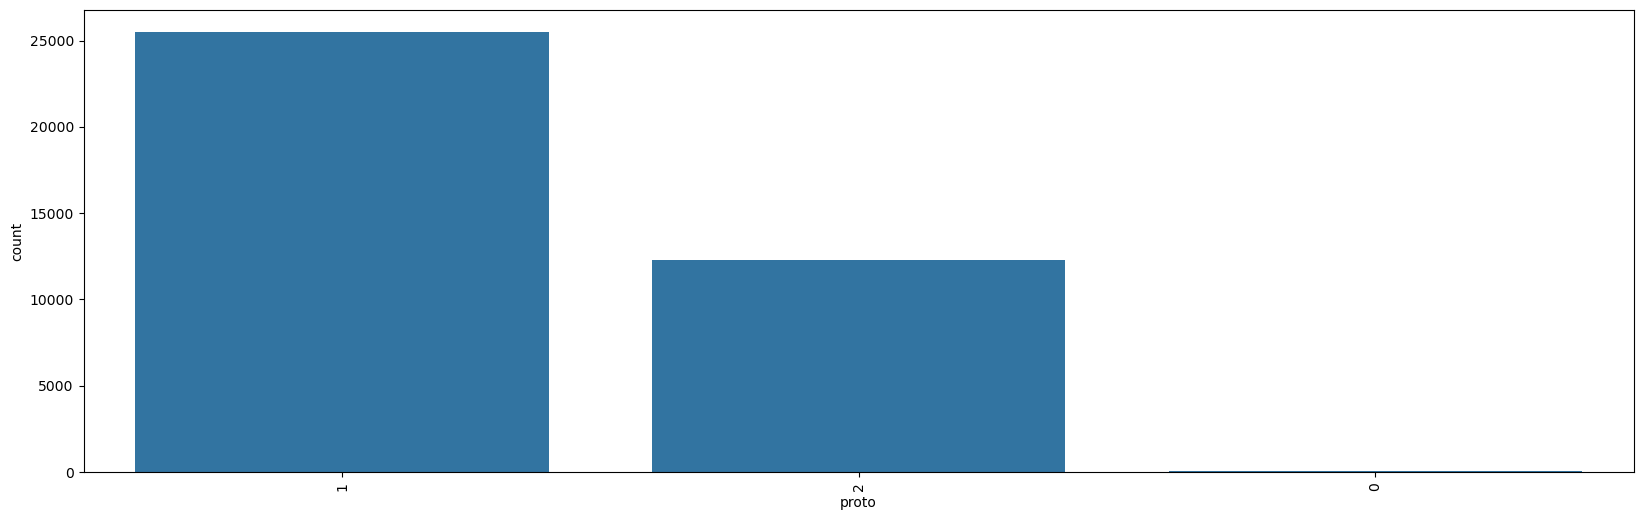

In [71]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=balanced_df,x=balanced_df['proto'],order=balanced_df['proto'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [72]:
balanced_df.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

## Finding numerical columns

In [74]:
num_cols = balanced_df.select_dtypes(include = "number")
num_cols

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
12507,5353,5353,2,1,0.000000,1,0,1,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0
12509,53544,443,1,9,42.492044,9,7,1,1,0.211804,...,2.967770e+05,1.180537e+05,1.025196e+07,1.025221e+07,4.100817e+07,1.025204e+07,1.154081e+02,501,118,0
12510,53542,443,1,9,42.515244,9,7,1,1,0.211689,...,3.210090e+05,1.174709e+05,1.022611e+07,1.022946e+07,4.091021e+07,1.022755e+07,1.570467e+03,501,118,0
12511,60654,443,1,9,43.726695,8,7,1,0,0.182955,...,5.647568e+05,1.230881e+06,1.022085e+07,1.022763e+07,4.090295e+07,1.022574e+07,3.273897e+03,501,7,501
12512,60690,443,1,9,43.984425,8,7,1,0,0.181883,...,6.284646e+05,1.339343e+06,1.020796e+07,1.021330e+07,4.084212e+07,1.021053e+07,2.222709e+03,501,7,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12502,49214,53,2,1,0.021042,1,1,1,1,47.524293,...,2.104187e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0
12503,56091,443,1,8,0.637960,10,11,5,4,15.674965,...,7.171900e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4380,65535,4380
12504,25384,53,2,1,0.031155,1,1,1,1,32.097710,...,3.115487e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0
12505,40434,8886,1,8,18761.401290,704,405,359,371,0.037524,...,3.537569e+05,8.785640e+05,5.089471e+06,6.010273e+07,1.864431e+10,5.649790e+07,1.107168e+07,4380,4096,3207


## Handling Outliers

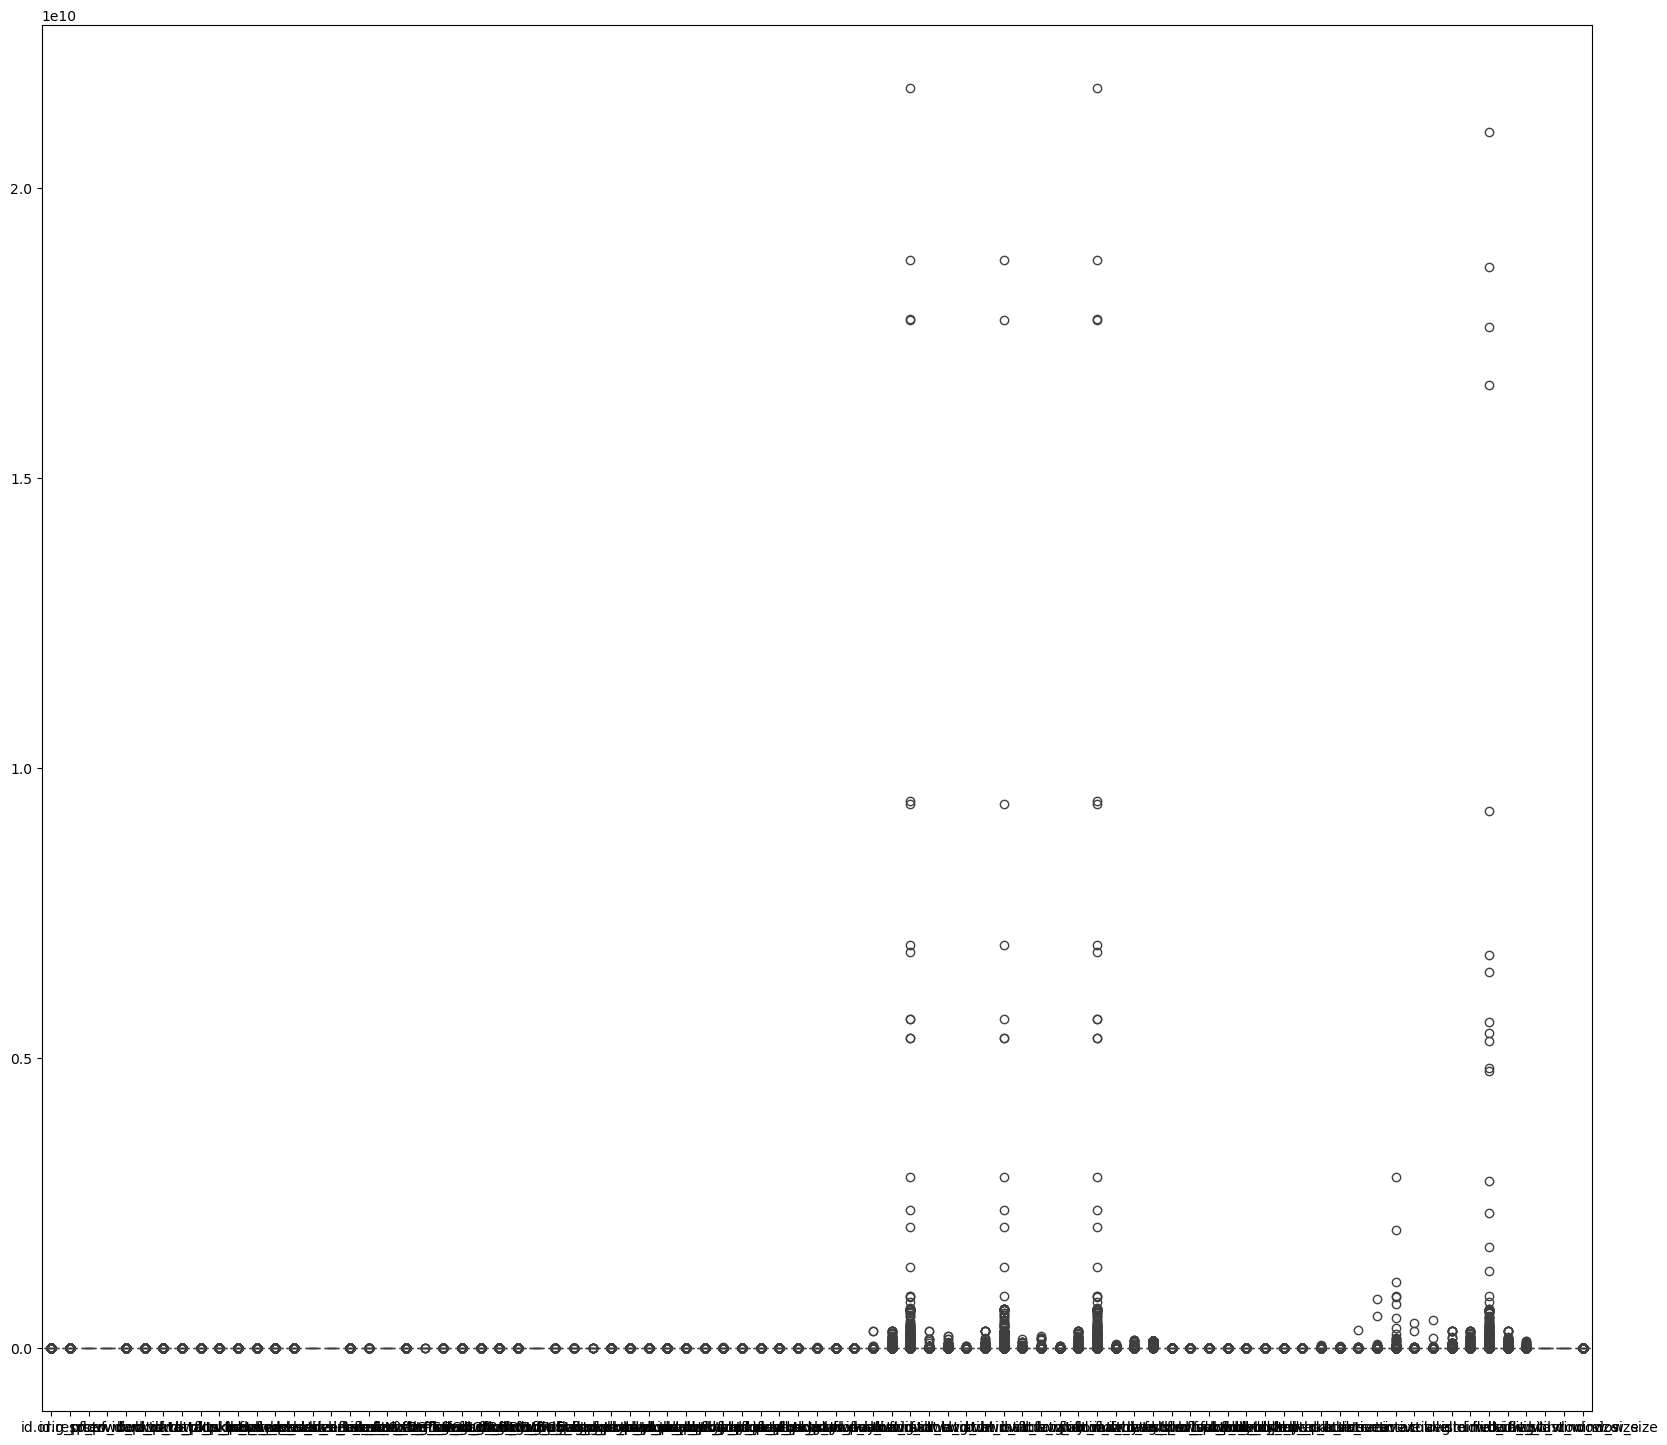

In [76]:
plt.figure(figsize = (20,18))
sns.boxplot(balanced_df)
plt.show()

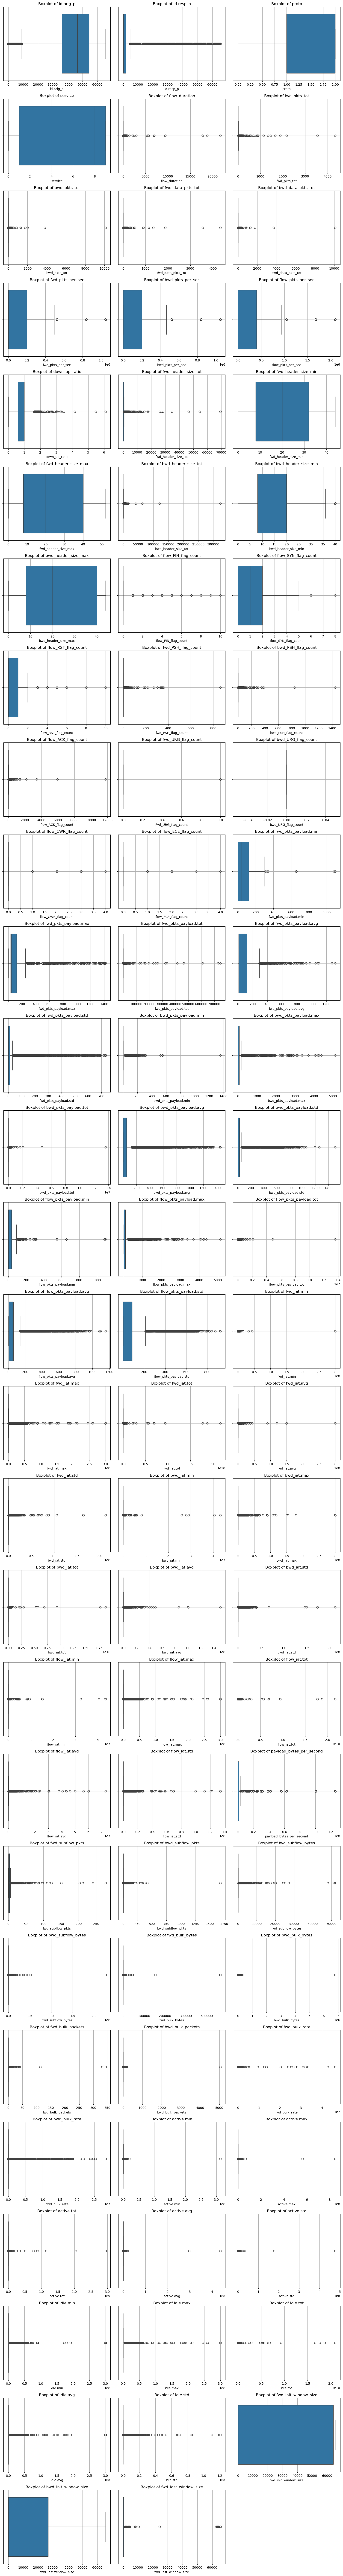

In [77]:
num_features = len(num_cols.columns)
rows = math.ceil(num_features / 3)  # Arrange plots in rows of 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of uneven grid

for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=balanced_df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [78]:
def handling_outliers(df):
    for col in df.select_dtypes(include = "number").columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        
        Lower_bound = Q1 - (1.5 * IQR) 
        Upper_bound = Q3 + (1.5 * IQR)

        df[col] = df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return(df)

In [79]:
df1 = handling_outliers(balanced_df)

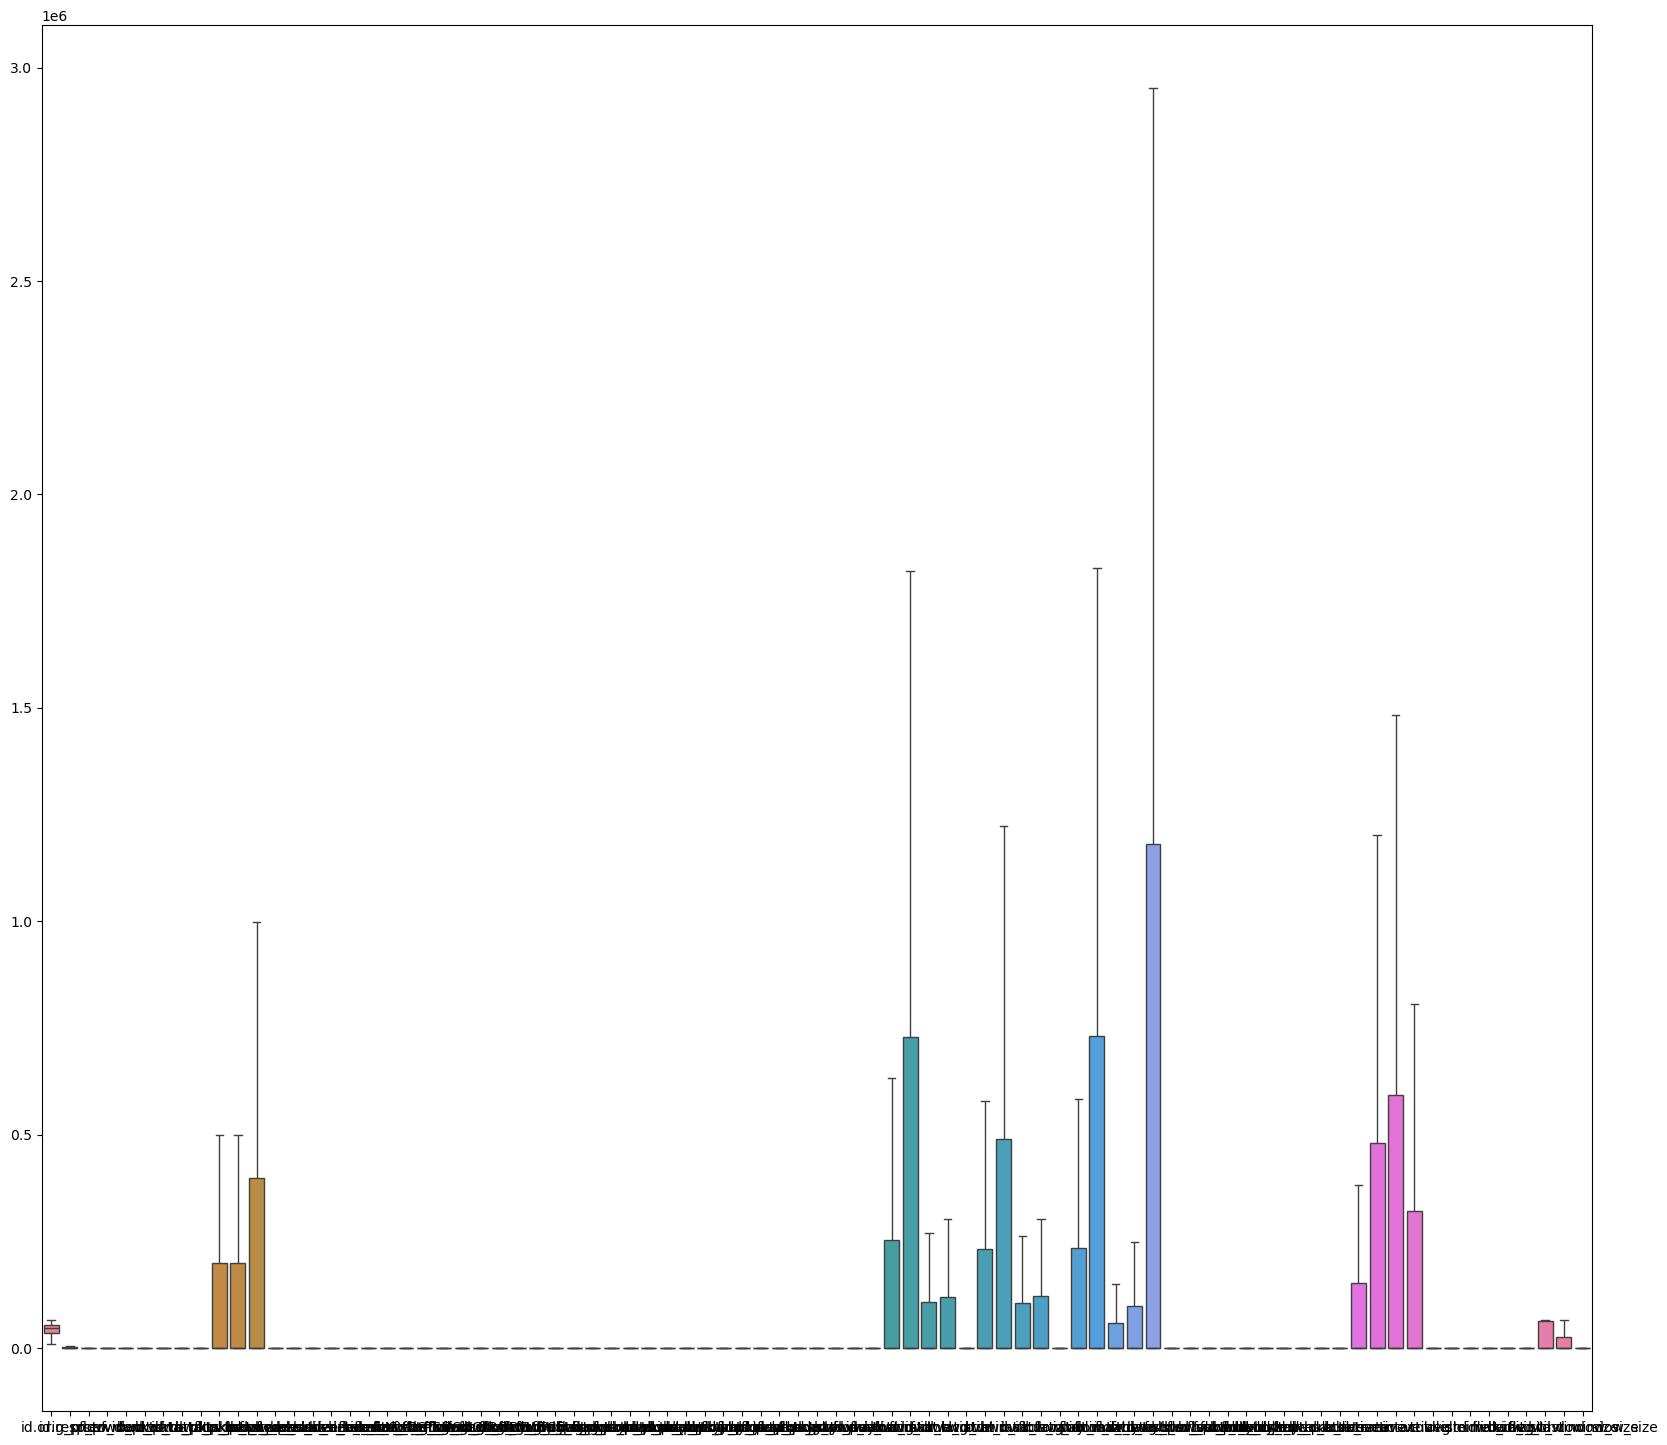

In [80]:
plt.figure(figsize = (20,18))
sns.boxplot(df1)
plt.show()

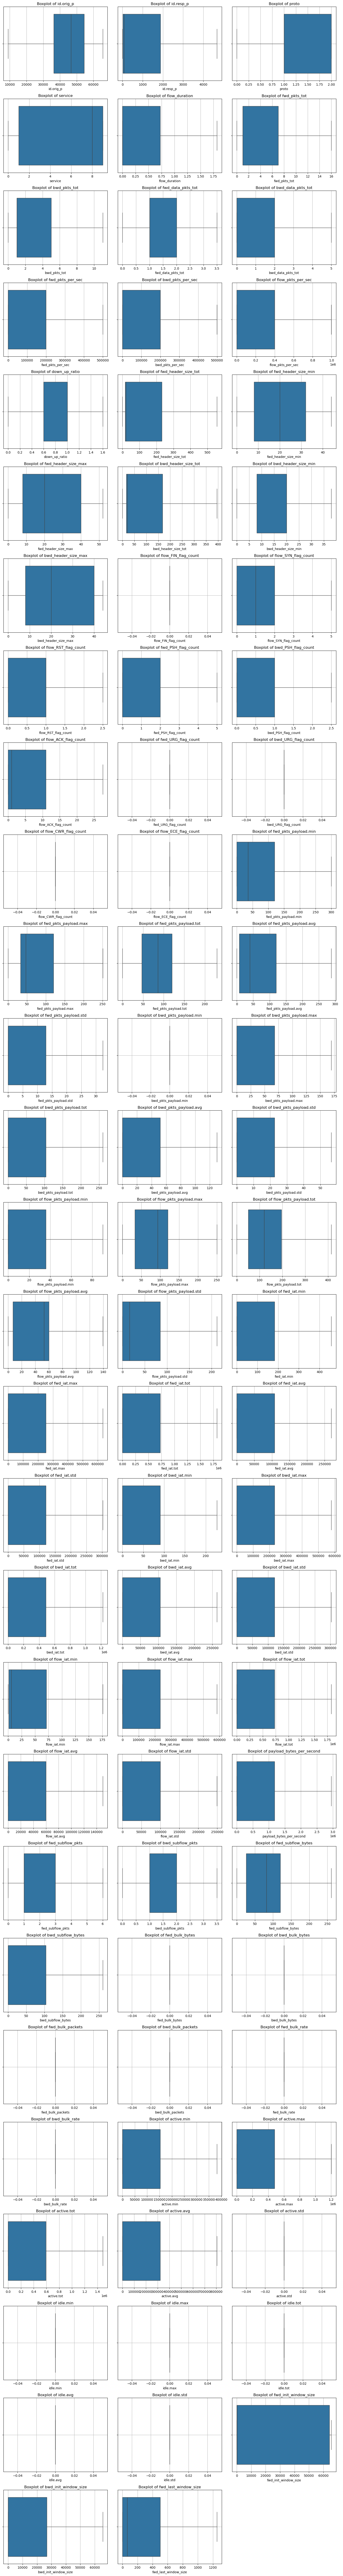

In [81]:
num_features = len(num_cols.columns)
rows = math.ceil(num_features / 3)  # Arrange plots in rows of 3

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten in case of uneven grid

for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=df1, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [82]:
df1.kurtosis()

id.orig_p               0.270154
id.resp_p               0.020912
proto                  -1.400883
service                -1.737190
flow_duration          -0.038450
                          ...   
idle.avg                0.000000
idle.std                0.000000
fwd_init_window_size   -1.227094
bwd_init_window_size    3.581786
fwd_last_window_size    0.205203
Length: 83, dtype: float64

In [83]:
df1.skew()

id.orig_p              -0.889526
id.resp_p               1.282208
proto                   0.726741
service                -0.333580
flow_duration           1.323835
                          ...   
idle.avg                0.000000
idle.std                0.000000
fwd_init_window_size    0.878717
bwd_init_window_size    1.985456
fwd_last_window_size    1.218097
Length: 83, dtype: float64

In [84]:
 pt = PowerTransformer(method='yeo-johnson')

In [85]:
numerical_features = df1.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [86]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])
df1[numerical_features]

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
12507,-2.002044,1.385221,1.385718,-1.358042,-0.681176,-0.826220,-1.590325,-0.382629,-0.883293,-1.163704,...,-1.167895,0.0,0.0,0.0,0.0,0.0,0.0,-1.206899,-0.605865,-1.202919
12509,0.704353,0.496853,-0.654864,0.905939,1.694536,1.451822,1.385947,-0.382629,0.467105,-1.116111,...,1.152010,0.0,0.0,0.0,0.0,0.0,0.0,0.303409,1.220182,-1.202919
12510,0.704172,0.496853,-0.654864,0.905939,1.694536,1.451822,1.385947,-0.382629,0.467105,-1.116134,...,1.161904,0.0,0.0,0.0,0.0,0.0,0.0,0.303409,1.220182,-1.202919
12511,1.378947,0.496853,-0.654864,0.905939,1.694536,1.401502,1.385947,-0.382629,-0.883293,-1.122057,...,1.231839,0.0,0.0,0.0,0.0,0.0,0.0,0.303409,0.520502,0.975598
12512,1.382513,0.496853,-0.654864,0.905939,1.694536,1.401502,1.385947,-0.382629,-0.883293,-1.122280,...,1.244822,0.0,0.0,0.0,0.0,0.0,0.0,0.303409,0.520502,0.975598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12502,0.323081,-0.596195,1.385718,-1.358042,-0.515433,-0.826220,-0.364142,-0.382629,0.467105,-0.279876,...,0.791408,0.0,0.0,0.0,0.0,0.0,0.0,-1.206899,-0.605865,-1.202919
12503,0.939161,0.496853,-0.654864,0.647629,1.303389,1.492036,1.763499,1.677968,1.390971,-0.507368,...,1.260755,0.0,0.0,0.0,0.0,0.0,0.0,0.761391,1.673093,1.387170
12504,-1.343661,-0.596195,1.385718,-1.358042,-0.440942,-0.826220,-0.364142,-0.382629,0.467105,-0.360064,...,0.848342,0.0,0.0,0.0,0.0,0.0,0.0,-1.206899,-0.605865,-1.202919
12505,-0.378628,1.385221,-0.654864,0.647629,1.694536,1.625955,1.763499,1.677968,1.504752,-1.154545,...,1.174089,0.0,0.0,0.0,0.0,0.0,0.0,0.761391,1.572463,1.387170


In [87]:
df1[numerical_features].skew()

id.orig_p              -0.298685
id.resp_p               0.156394
proto                  -0.193141
service                -0.360118
flow_duration           0.959867
                          ...   
idle.avg                0.000000
idle.std                0.000000
fwd_init_window_size    0.072643
bwd_init_window_size    1.045250
fwd_last_window_size   -0.110416
Length: 83, dtype: float64

In [88]:
correlation = df1.corr()
correlation

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
id.orig_p,1.000000,0.381379,0.250559,-0.109348,0.106049,0.141440,0.047177,0.025284,0.182225,-0.264947,...,0.128335,NaN,NaN,NaN,NaN,NaN,NaN,-0.027704,0.093211,-0.142035
id.resp_p,0.381379,1.000000,0.117439,-0.023565,0.279280,0.198144,0.018404,-0.071131,0.118417,-0.441463,...,0.094551,NaN,NaN,NaN,NaN,NaN,NaN,0.236751,0.278214,0.168073
proto,0.250559,0.117439,1.000000,-0.554786,-0.294711,-0.143157,-0.314732,0.014248,0.146307,-0.339547,...,-0.011972,NaN,NaN,NaN,NaN,NaN,NaN,-0.790354,-0.396759,-0.787748
service,-0.109348,-0.023565,-0.554786,1.000000,-0.256076,-0.423035,-0.225320,-0.486489,-0.549167,0.472290,...,-0.540825,NaN,NaN,NaN,NaN,NaN,NaN,0.237875,-0.199578,0.387046
flow_duration,0.106049,0.279280,-0.294711,-0.256076,1.000000,0.913694,0.814203,0.758304,0.741835,-0.580214,...,0.828421,NaN,NaN,NaN,NaN,NaN,NaN,0.668822,0.935881,0.315466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle.avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idle.std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fwd_init_window_size,-0.027704,0.236751,-0.790354,0.237875,0.668822,0.559996,0.619285,0.263787,0.245539,-0.029671,...,0.406814,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.772578,0.803111
bwd_init_window_size,0.093211,0.278214,-0.396759,-0.199578,0.935881,0.877551,0.797092,0.686085,0.656327,-0.518319,...,0.744811,NaN,NaN,NaN,NaN,NaN,NaN,0.772578,1.000000,0.410946


Text(0.5, 1.0, 'IoT Data Correlation')

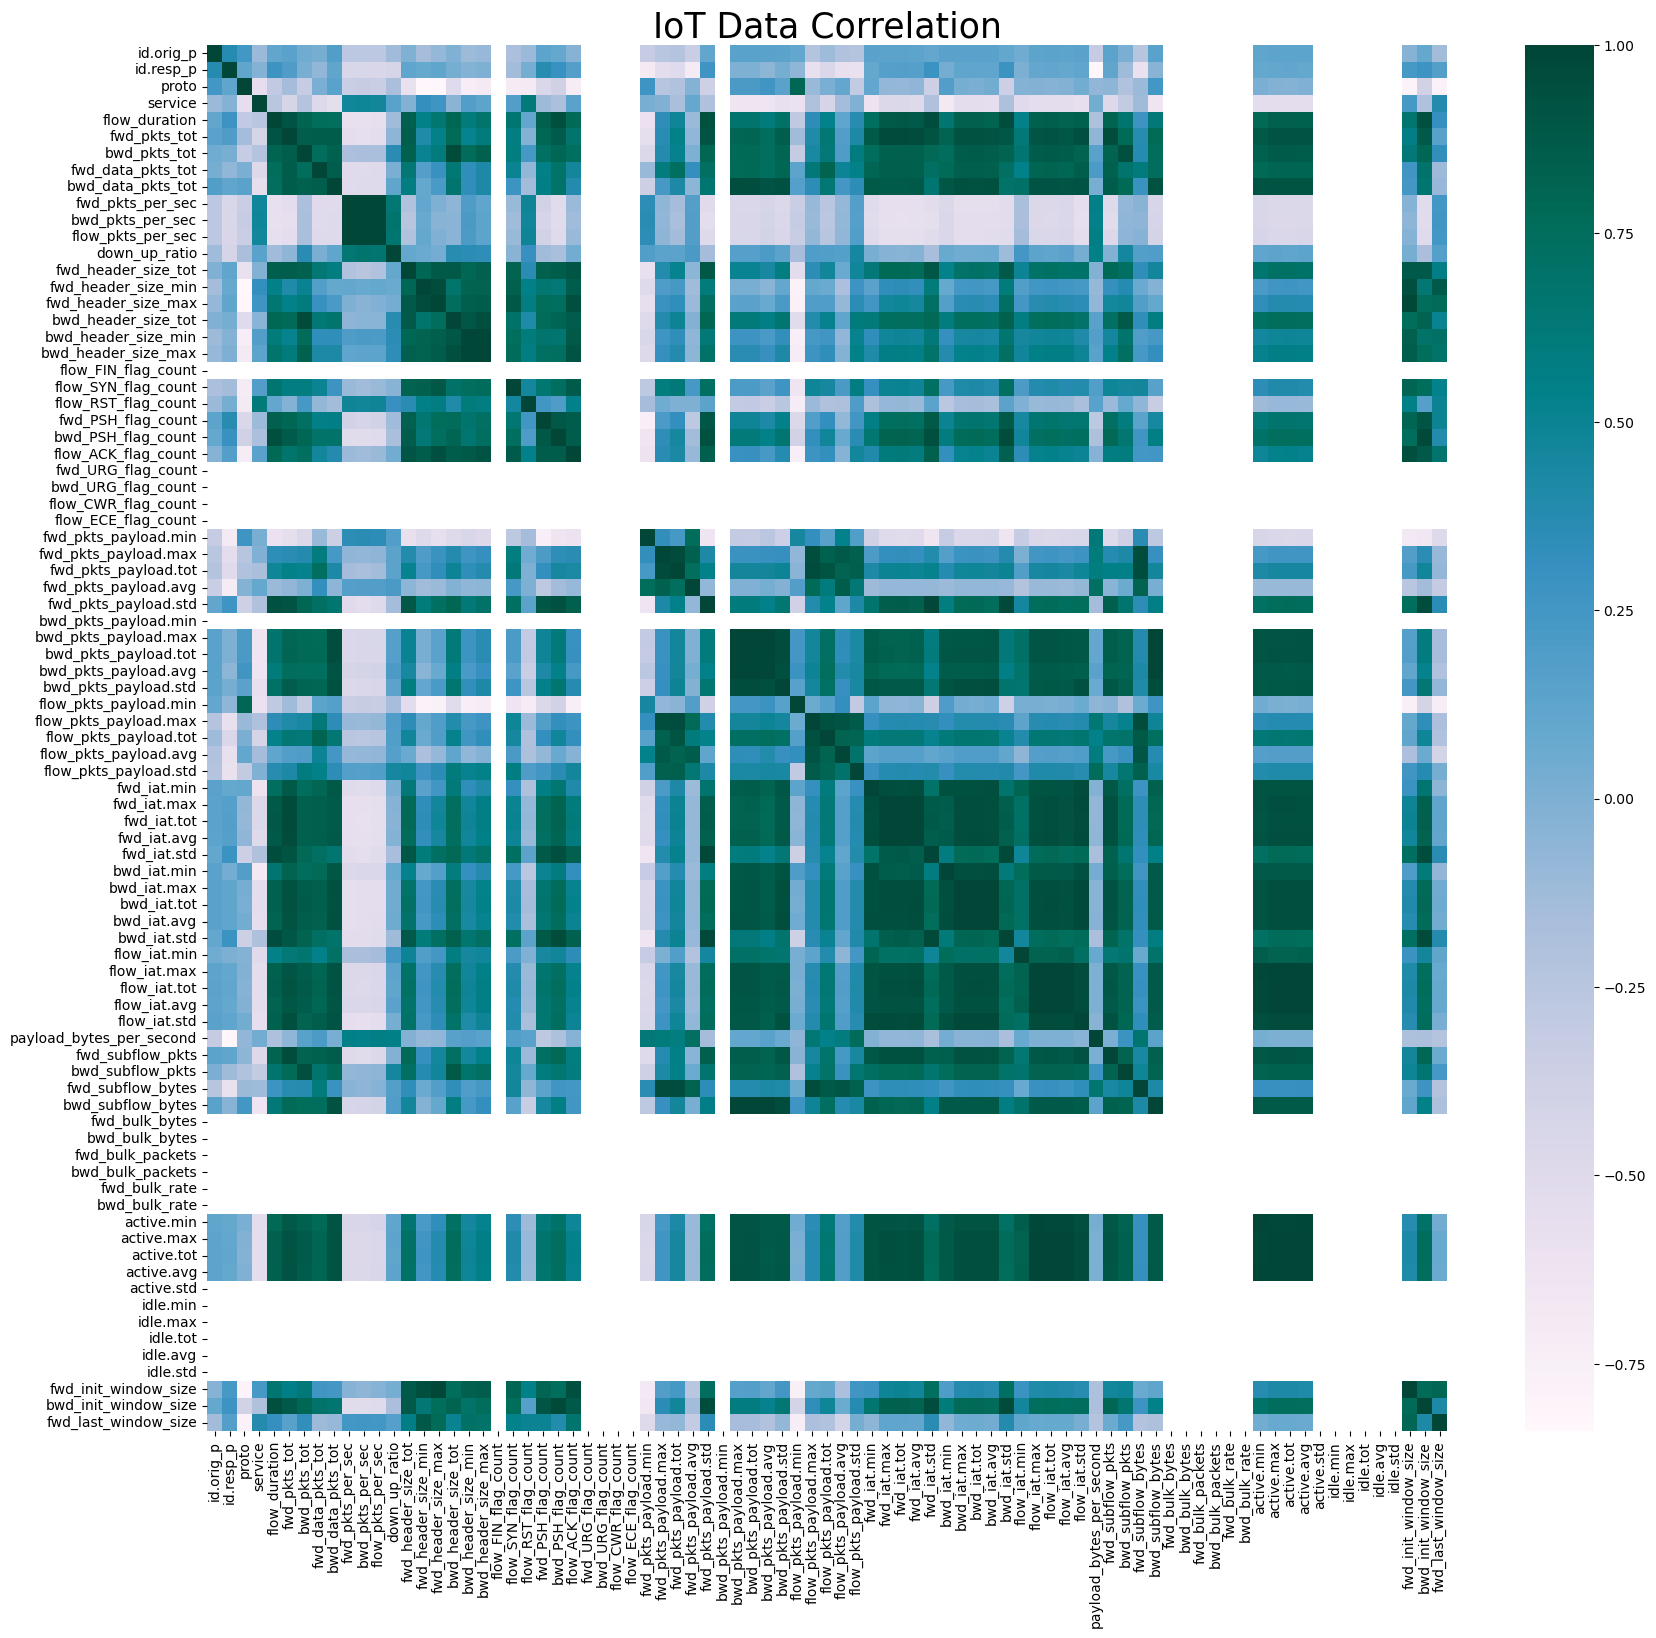

In [89]:
plt.figure(figsize=(20,18))
sns.heatmap(correlation,annot=False,cmap='PuBuGn') 
plt.title("IoT Data Correlation", size = 25)

## Feature Selection

In [91]:
sk = SelectKBest(score_func=f_classif,k=50)

In [92]:
X_new = sk.fit_transform(X,y)

In [93]:
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
       'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min',
       'fwd_header_size_max', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'fwd_URG_flag_count', 'fwd_pkts_payload.min',
       'fwd_pkts_payload.max', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.max',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.max',
       'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.max', 'bwd_iat.avg',
       'bwd_iat.std', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg',
       'flow_iat.std', 'payload_bytes_per_second', 'fwd_subflow_pkts',
       'active.min', 'active.avg', 'idle.min', 'idle

In [94]:
X_selected = X[selected_features]
X_selected.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec',
       'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min',
       'fwd_header_size_max', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'fwd_URG_flag_count', 'fwd_pkts_payload.min',
       'fwd_pkts_payload.max', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.max',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.max',
       'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.max', 'bwd_iat.avg',
       'bwd_iat.std', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg',
       'flow_iat.std', 'payload_bytes_per_second', 'fwd_subflow_pkts',
       'active.min', 'active.avg', 'idle.min', 'idle.max', 'idle.avg',


## Scaling

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_selected)
x_scaled

array([[ 0.19603038,  0.15512826, -0.33961396, ...,  3.069373  ,
         2.3635056 , -0.03815473],
       [ 0.85384022,  0.15512826, -0.33961396, ...,  3.069373  ,
         2.3635056 , -0.03815473],
       [ 0.51734275,  0.15512826, -0.33961396, ...,  3.069373  ,
         2.3635056 , -0.03815473],
       ...,
       [ 1.2811319 , 11.86112808, -0.33961396, ..., -0.27653551,
        -0.27696919,  0.04546833],
       [ 1.2811319 , 11.92077934, -0.33961396, ..., -0.27653551,
        -0.27696919,  0.04546833],
       [ 1.2811319 , 11.94482625, -0.33961396, ..., -0.27653551,
        -0.27696919,  0.04546833]])

## Splitting data

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

In [99]:
print(f""" 
X_train shape : {x_train.shape}
X_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (94337, 50)
X_test shape : (23585, 50)
y_train shape : (94337,)
y_test shape : (23585,) 



## Model building - Classification models

In [101]:
Models = {
    '1.LogisticRegression' : LogisticRegression(),
    '2.SVC' : SVC(),
    '3.Decision Tree Classifier' :DecisionTreeClassifier(),
    '4. Random Forest Classifier' : RandomForestClassifier(),
    '5.Gradient Boosting Classifier' : GradientBoostingClassifier(),
    '6. Naive Bayes Classifier ' : GaussianNB(),
    '7. K Neighbors Classifier' : KNeighborsClassifier()
}

In [102]:
result ={}
for name, model in Models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    result[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(result[name]['report'])


Training 1.LogisticRegression...
1.LogisticRegression Accuracy: 0.9829

Classification Report:
                            precision    recall  f1-score   support

            ARP_poisioning       0.91      0.84      0.88      1535
            DDOS_Slowloris       0.96      0.75      0.85       102
             DOS_SYN_Hping       1.00      1.00      1.00     18020
              MQTT_Publish       1.00      1.00      1.00       855
Metasploit_Brute_Force_SSH       1.00      0.71      0.83         7
             NMAP_FIN_SCAN       0.75      0.75      0.75         4
         NMAP_OS_DETECTION       0.99      1.00      1.00       377
             NMAP_TCP_scan       0.99      1.00      0.99       216
             NMAP_UDP_SCAN       0.95      0.98      0.97       499
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       366
               Thing_Speak       0.86      0.94      0.90      1559
                Wipro_bulb       0.83      0.56      0.67        45

                  

### Overfitting Detection
Overfitting happens when a model performs exceptionally well on training data but fails to generalize to unseen data. This is evident when the training accuracy is significantly higher than test accuracy or when there is a big drop from training to cross-validation scores.

#### 👉 If training accuracy is much higher than test accuracy, the model is overfitting.

### Signs of Overfitting
* Perfect training accuracy (1.0000) is a red flag.
* Small gap between test (0.9980) and cross-validation accuracy (0.9921) suggests mild overfitting.
* Since test accuracy and cross-validation accuracy are still very high, the model generalizes well, but we can improve robustness further.

### Cross-Validation Score
##### 👉 If cross-validation accuracy is much lower than training accuracy, overfitting is likely.

#### Interpretation of CV Score:
* A high CV score indicates that the model performs well across different subsets of the dataset and generalizes well to unseen data.
* A low CV score suggests that the model might overfit or underfit and is likely not generalizing well.

In [106]:
overfitting = {}  # Dictionary to store results

for name, model in Models.items():
    print(f"\nTraining {name} with 5-Fold Cross-Validation...")

    # Train the model
    model.fit(x_train, y_train)

    # Compute accuracies
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    # Perform 5-Fold Cross-Validation on training data
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    mean_cv_acc = cv_scores.mean()

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Mean Cross-validation Accuracy: {mean_cv_acc:.4f}")

    # Store results in dictionary
    overfitting[name] = {
        "Training Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Mean Cross-Val Accuracy": mean_cv_acc
    }

# Convert dictionary to DataFrame for better visualization
df_overfit = pd.DataFrame.from_dict(overfitting, orient="index").sort_values(by="Mean Cross-Val Accuracy", ascending=False)

print("\nFinal Overfitting Analysis:")
print(df_overfit)


Training 1.LogisticRegression with 5-Fold Cross-Validation...
Training Accuracy: 0.9839
Test Accuracy: 0.9829
Mean Cross-validation Accuracy: 0.9833

Training 2.SVC with 5-Fold Cross-Validation...
Training Accuracy: 0.9955
Test Accuracy: 0.9938
Mean Cross-validation Accuracy: 0.9940

Training 3.Decision Tree Classifier with 5-Fold Cross-Validation...
Training Accuracy: 1.0000
Test Accuracy: 0.9972
Mean Cross-validation Accuracy: 0.9968

Training 4. Random Forest Classifier with 5-Fold Cross-Validation...
Training Accuracy: 1.0000
Test Accuracy: 0.9979
Mean Cross-validation Accuracy: 0.9979

Training 5.Gradient Boosting Classifier with 5-Fold Cross-Validation...
Training Accuracy: 0.9981
Test Accuracy: 0.9971
Mean Cross-validation Accuracy: 0.9975

Training 6. Naive Bayes Classifier  with 5-Fold Cross-Validation...
Training Accuracy: 0.9231
Test Accuracy: 0.9233
Mean Cross-validation Accuracy: 0.9209

Training 7. K Neighbors Classifier with 5-Fold Cross-Validation...
Training Accuracy:

### Cross-Validation Results: Measuring Generalization
Cross-validation helps assess how well the model generalizes. Instead of relying on a single train-test split, it:

* Splits data into multiple folds (3-Fold in our case).
* Trains the model on different subsets and averages the results.
* Random Forest & Decision Tree have the highest overfitting risk since training accuracy is 100%, but test accuracy is slightly lower.
* SVC and KNN show strong generalization with minimal drop in accuracy across training, test, and cross-validation.
* Naïve Bayes underfits, as its accuracy is consistently lower across all datasets.

### Key Insights & Model Performance Analysis
📌 Best Performing Models (Low Overfitting & High Generalization)

✅ Logistic Regression, SVC, and K-Nearest Neighbors (KNN)

* These models have minimal differences between training, test, and cross-validation accuracy, indicating that they generalize well.
* KNN (99.57% CV accuracy) and SVC (99.33% CV accuracy) are the most balanced models.

📌 Overfitting Detected (Models Learning Too Much)

🔴 Decision Tree & Random Forest (100% Training Accuracy)

* These models have perfect training accuracy, meaning they are likely memorizing the dataset rather than learning patterns.
* A small drop in test and cross-validation accuracy confirms overfitting.
* These models might not perform well on unseen data and should be regularized.

🟠 Gradient Boosting (Overfitting but Slightly Better Generalization)

* Gradient Boosting is highly accurate but still shows signs of overfitting.
* The drop from 99.81% (Training) → 99.70% (Test) → 99.70% (CV) suggests that it generalizes better than Decision Trees but still needs tuning.

📌 Underfitting Detected (Model Too Simple)
⬇️ Naïve Bayes Classifier (Consistently Low Accuracy)

* All three accuracy metrics (~92.3%) are consistently low, meaning the model is too simple for the dataset.
* It is not overfitting but is likely underfitting, meaning it does not capture enough patterns from the data.

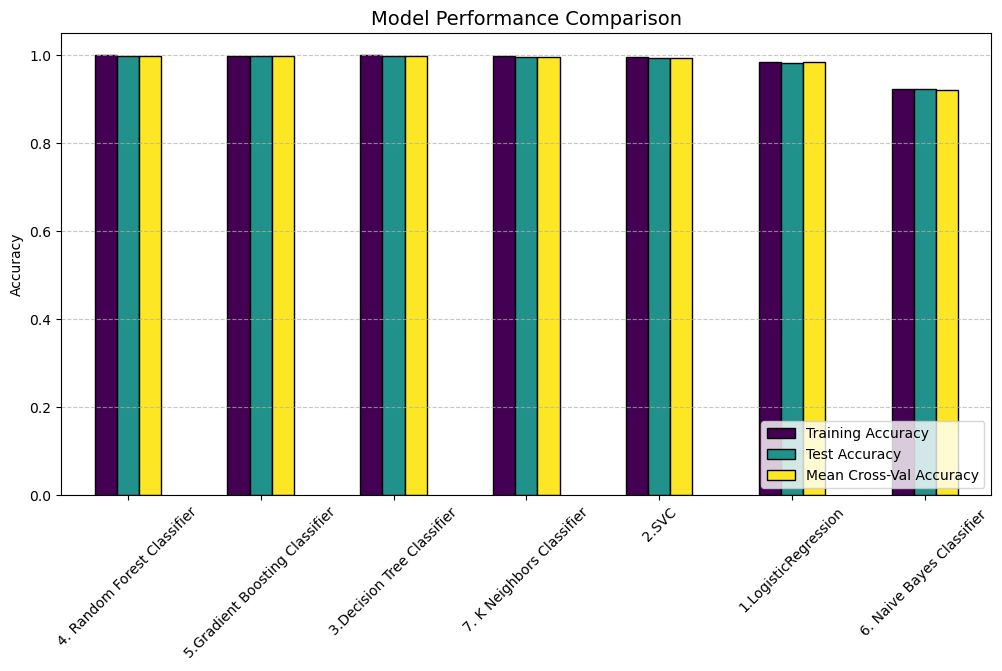

In [109]:
# 🔹 Bar Chart Visualization
df_overfit.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

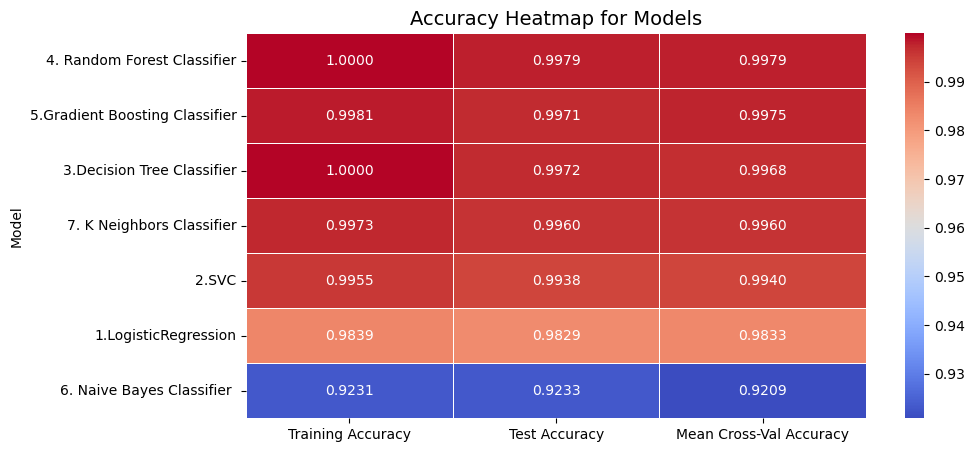

In [110]:
# 🔹 Heatmap Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df_overfit, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Accuracy Heatmap for Models", fontsize=14)
plt.ylabel("Model")
plt.show()